# Incase some of the code doesnt work, that maybe due to changes in the versions of the packages, im adding a link to google drive file - a pdf of the project so you can see that those part work :)



## Description

In the following project i am going to analyze the data of the gym members in order to understand better the chances of a customer to churn, and customer segmentation.

Project table of contents:

1. Preprocessing
2. EDA
3. Modeling
4. Clustering
5. Conclusion

## Loading and PreProcessing

In [110]:
#importing and reading
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score
import pandas_profiling as pdpr
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [111]:
path = r'/datasets/gym_churn_us.csv'

In [112]:
gym = pd.read_csv(path)

In [113]:
pdpr.ProfileReport(gym)

In [114]:
#getting df info
gym.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [115]:
#basic statistics
gym.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [116]:
#smaple
gym.sample(5)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
3319       1              1        1              0      1                1   
105        1              0        0              0      1                1   
2126       0              0        1              0      1                1   
3929       0              1        0              0      1               12   
2954       0              1        0              0      0                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
3319             0   32                    185.010427                    1.0   
105              1   23                    181.459716                    1.0   
2126             0   18                     28.734693                    1.0   
3929             1   27                     15.558586                   12.0   
2954             0   26                     24.291403                    1.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
3319         7                   2.995296                           2.946472   
105          1                   1.928169                           1.531734   
2126         2                   0.723203                           0.000000   
3929         6                   0.808582                           0.897952   
2954         1                   2.203478                           1.905487   

      Churn  
3319      0  
105       1  
2126      1  
3929      0  
2954      1

In [117]:
#Changing the columns to lowercase
gym.columns = gym.columns.str.lower()

#### Conclusion

- There are no missing or duplicated values

- All the variables types are ok

- Zeros in Lifetime maybe due to the fact that the customer is registered for less than 1 month or becuase he chruned

- No changes necessary

## EDA

In [118]:
#mean feature values in two groups
gym_pt = gym.pivot_table(index='churn', aggfunc='mean')

gym_pt

age  avg_additional_charges_total  \
churn                                            
0      29.976523                    158.445715   
1      26.989632                    115.082899   

       avg_class_frequency_current_month  avg_class_frequency_total  \
churn                                                                 
0                               2.027882                   2.024876   
1                               1.044546                   1.474995   

       contract_period    gender  group_visits  lifetime  \
churn                                                      
0             5.747193  0.510037      0.464103  4.711807   
1             1.728558  0.510839      0.268615  0.990575   

       month_to_end_contract  near_location   partner     phone  promo_friends  
churn                                                                           
0                   5.283089       0.873086  0.534195  0.903709       0.353522  
1                   1.662582       0.768143  0.355325  0.902922       0.183789

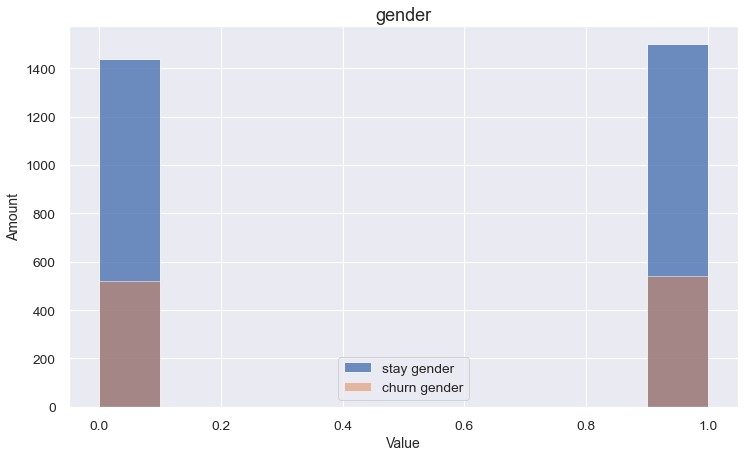

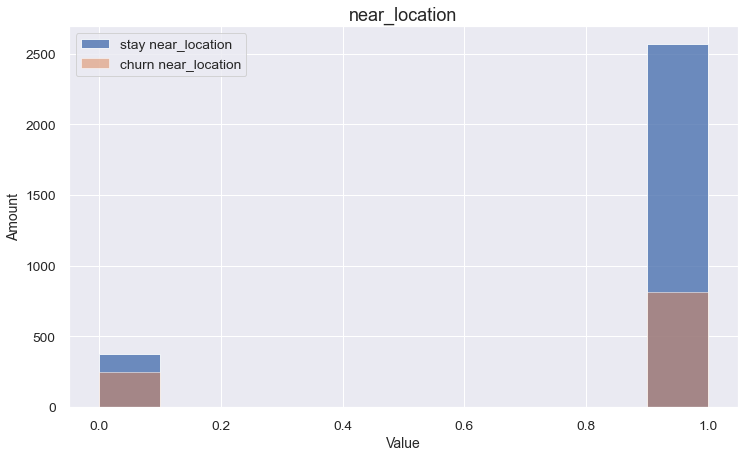

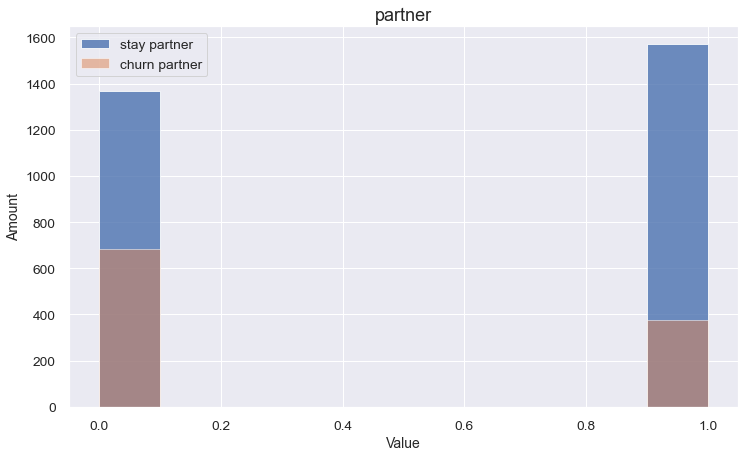

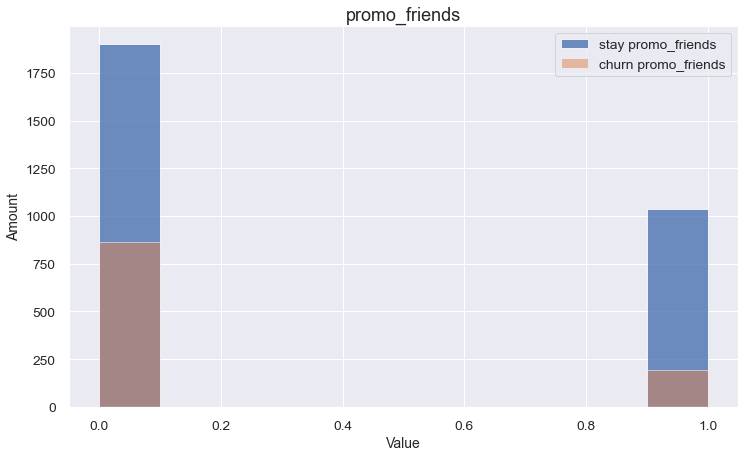

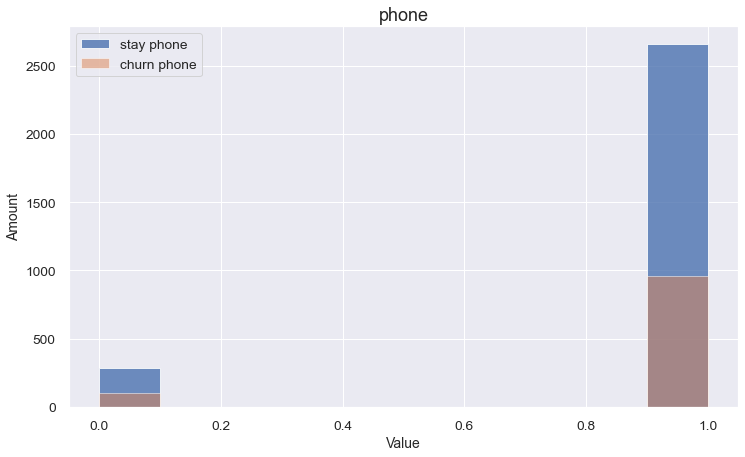

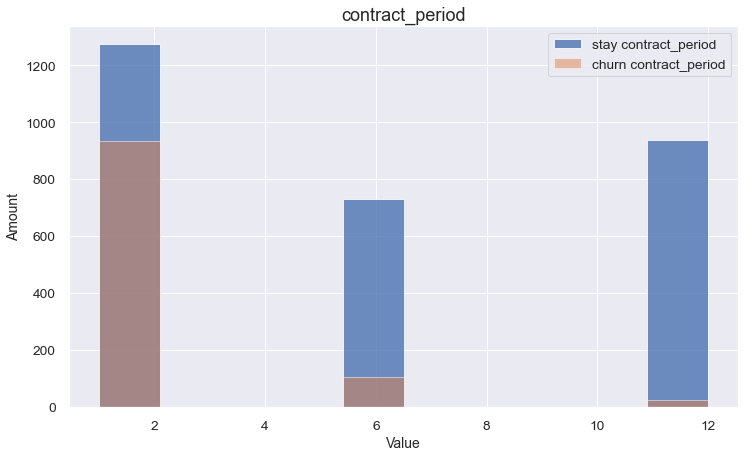

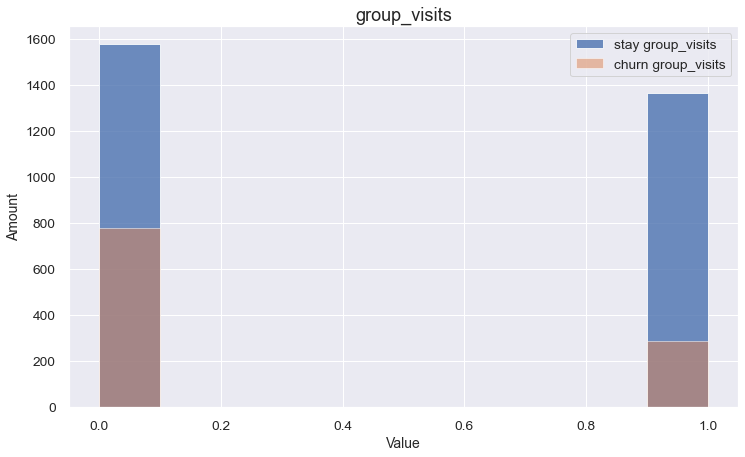

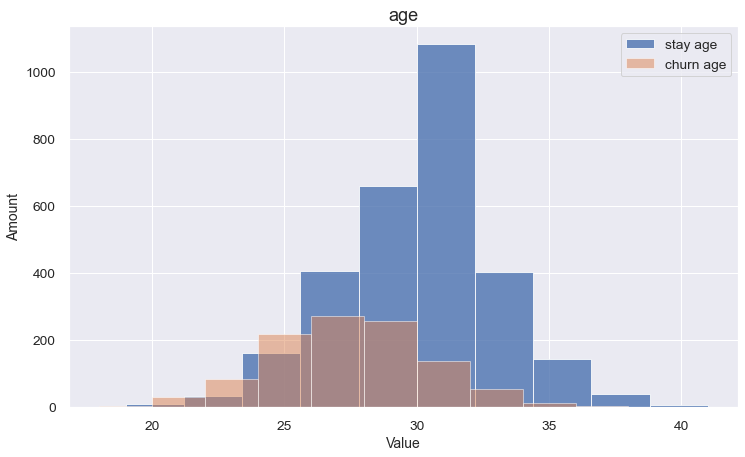

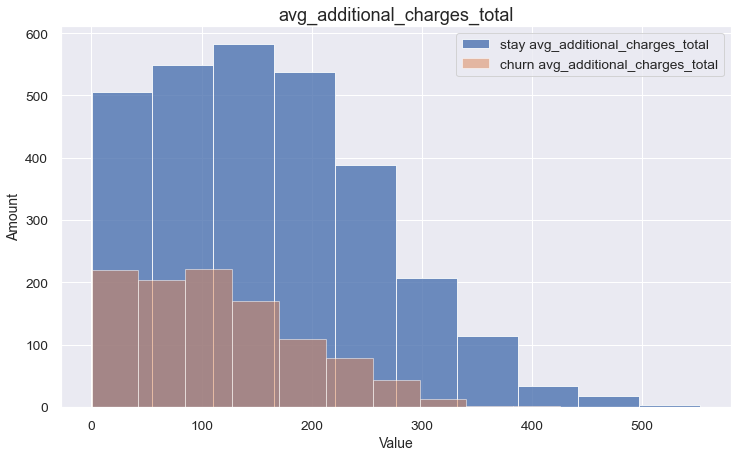

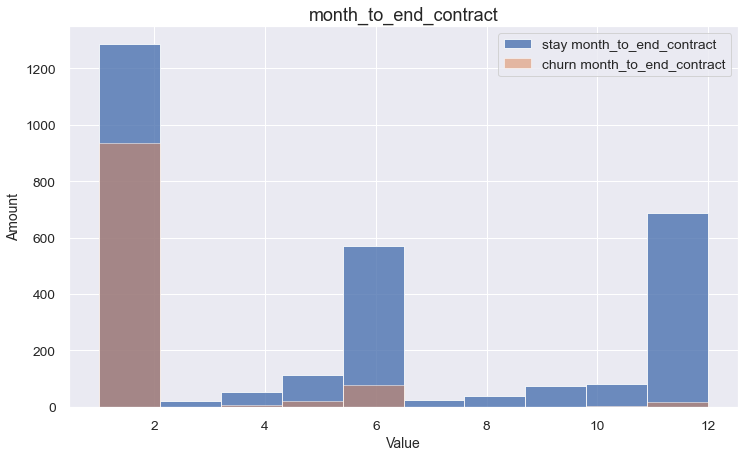

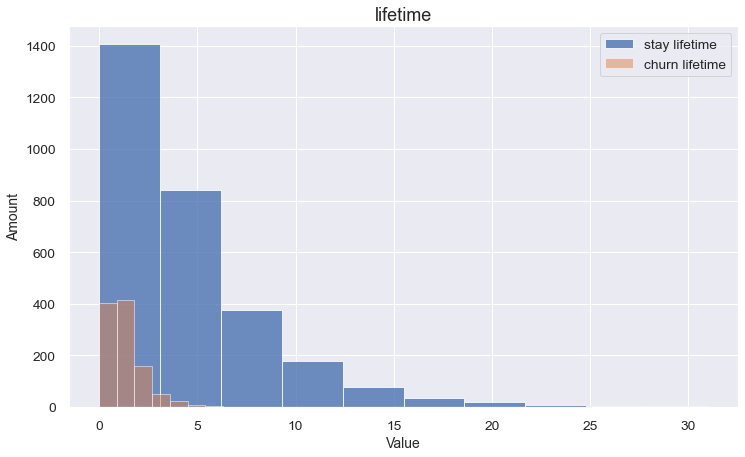

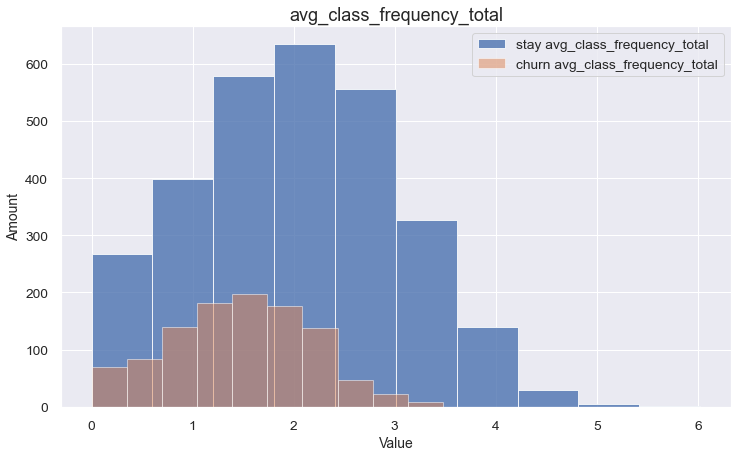

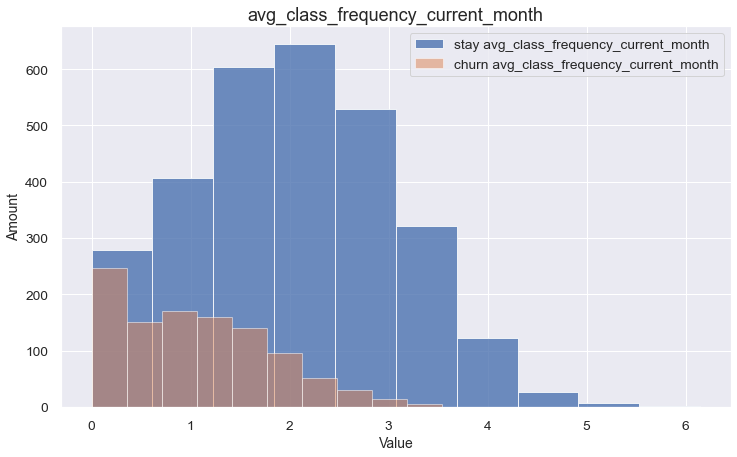

In [119]:
#Histograms for churned and unchurned

churn = gym.query('churn==1')

stay = gym.query('churn==0')

features_list = churn.drop(columns = ['churn']).columns
features_list

for feat in features_list:
    plt.figure(figsize=(12,7))
    plt.grid=True
    plt.title(feat,fontdict={'fontsize':18})
    plt.hist(stay[feat],label='stay '+feat,alpha=0.8)
    plt.hist(churn[feat],label='churn '+feat,alpha=0.5)
    plt.xlabel('Value',fontdict={'fontsize':14})
    plt.ylabel('Amount',fontdict={'fontsize':14})
    plt.legend()
    plt.show()
    print()
    print()

#### Conclusions

The charchteristics of people who churn are:
1. Coming to 1.4 classes per month on avg
2. Have shorter contracts
3. Go less to group classes
4. Churn when they have around 1.5 month left
5. Probably did not come through a partner program
6. Are more likely to churn than people who came through a friend promotion
7. Mostly churn in the first 3 month 

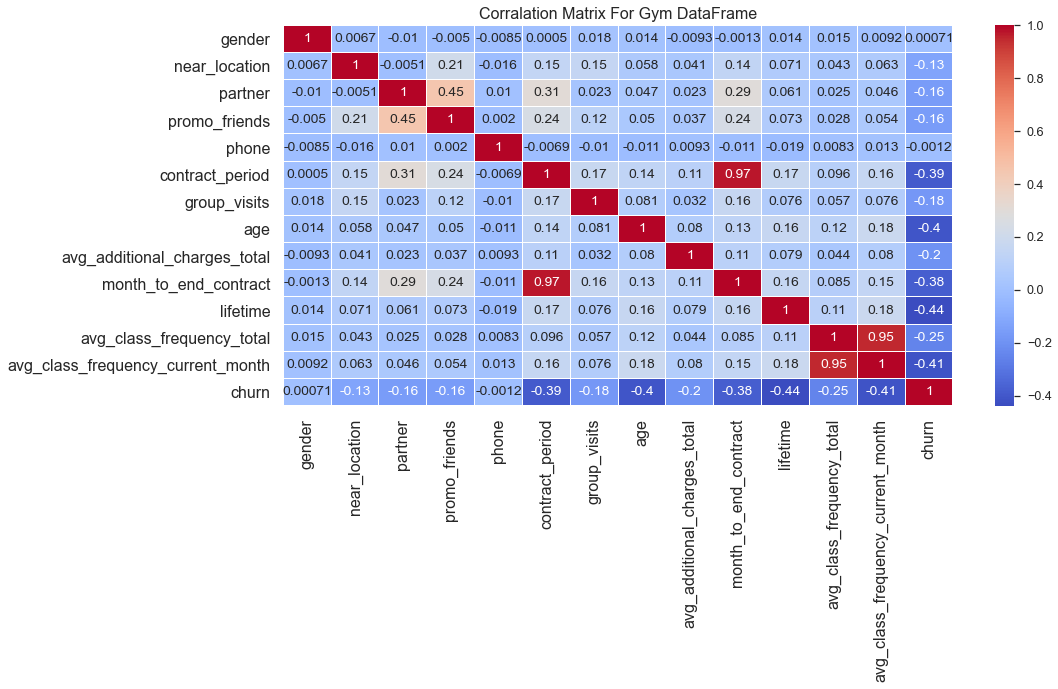

In [120]:
#corrlation matrix
cor_matrix = gym.corr()

plt.figure(figsize=(15,7))
sns.set(font_scale=1.15)
heat = sns.heatmap(cor_matrix, annot=True, cmap='coolwarm',linewidths=0.01,linecolor='white')
plt.tick_params(labelsize=16)
plt.title('Corralation Matrix For Gym DataFrame',fontdict={'fontsize':16})
plt.show()

#### Conclusion

There is a strong corralation between month to end of contract and contract period, also between avg class frequency current month to avg class frequency total which makes sense.
in addition there is a some corralation between promo_friends and partner which means that probably people from a partner company make their friends sign up as well!

## Model Building

In [121]:
#building model
models =[RandomForestClassifier(random_state=0),LogisticRegression(random_state=0)]

#declaring targey value and features
X = gym.drop(['churn'],axis=1)
y = gym['churn']

#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [122]:
#training the model
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(accuracy_score(y_test, y_pred),
                                                                precision_score(y_test, y_pred),
                                                                recall_score(y_test, y_pred)))

In [123]:
#makeing predictions and printing
for model in models:
    print(model)
    make_prediction(model,X_train, y_train,X_test, y_test)
    print()

RandomForestClassifier(random_state=0)
Accuracy:0.92 Precision:0.84 Recall:0.82 

LogisticRegression(random_state=0)
Accuracy:0.91 Precision:0.82 Recall:0.80 



C:\Users\nil34\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Conclusion

RandomForestClassifier did a better job by a little bit

## Clustring

In [124]:
#Standrdizing features

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

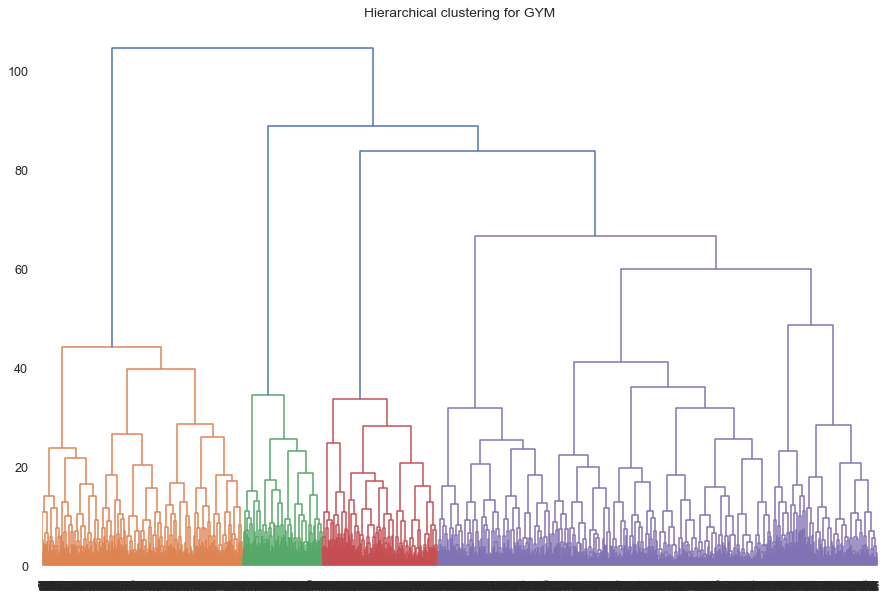

In [125]:
linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

#### Conclusion

We can single out between 4-6 major groups

In [126]:
#training KMeans algorithym

km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)
gym['cluster'] = labels

In [127]:
#table look
gym.pivot_table(index='cluster')

age  avg_additional_charges_total  \
cluster                                            
0        29.301299                    143.957664   
1        28.145267                    131.369042   
2        30.196149                    164.579011   
3        28.499360                    129.812508   
4        29.993590                    164.563799   

         avg_class_frequency_current_month  avg_class_frequency_total  \
cluster                                                                 
0                                 1.716369                   1.847220   
1                                 1.086883                   1.325865   
2                                 2.934140                   2.928140   
3                                 1.176172                   1.355379   
4                                 2.020129                   2.028169   

            churn  contract_period    gender  group_visits  lifetime  \
cluster                                                                
0        0.267532         4.787013  0.522078      0.425974  3.924675   
1        0.550141         1.866917  0.480787      0.325211  2.345829   
2        0.048135         2.730445  0.559567      0.448857  5.010830   
3        0.395647         2.554417  0.509603      0.303457  2.832266   
4        0.023504        11.352564  0.495726      0.564103  4.817308   

         month_to_end_contract  near_location   partner     phone  \
cluster                                                             
0                     4.475325       0.862338  0.470130  0.000000   
1                     1.791003       0.812559  0.000000  1.000000   
2                     2.519856       0.858002  0.338147  0.998797   
3                     2.370038       0.750320  1.000000  1.000000   
4                    10.376068       0.943376  0.752137  1.000000   

         promo_friends  
cluster                 
0             0.306494  
1             0.086223  
2             0.197353  
3             0.451985  
4             0.541667

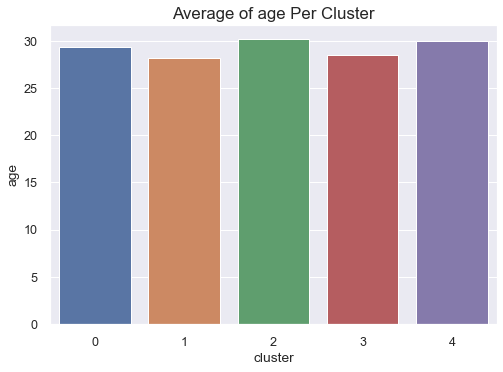

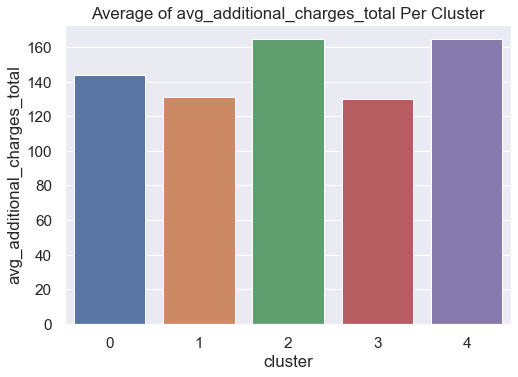

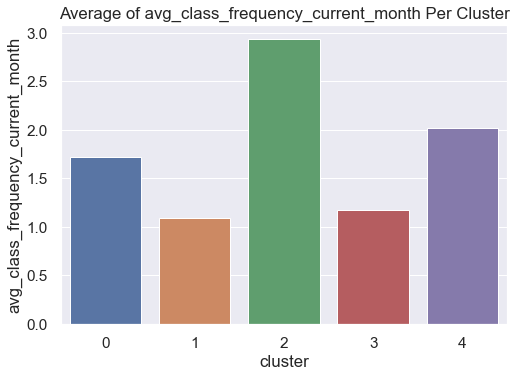

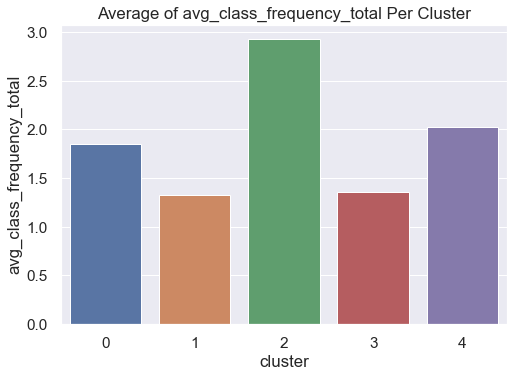

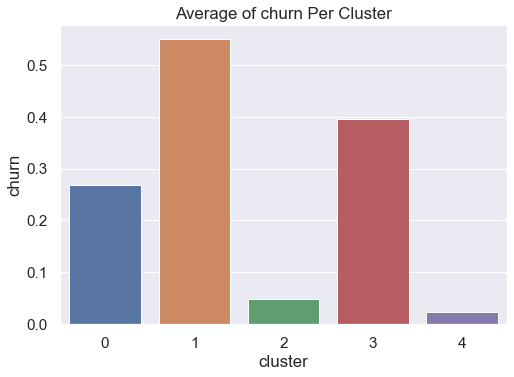

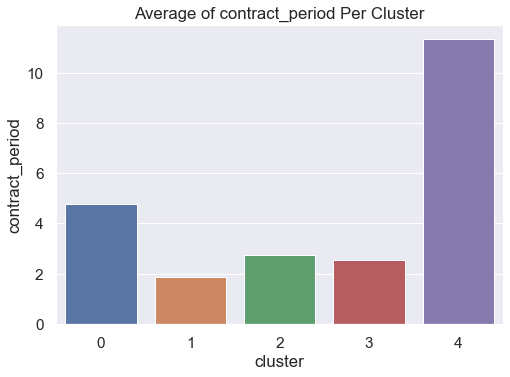

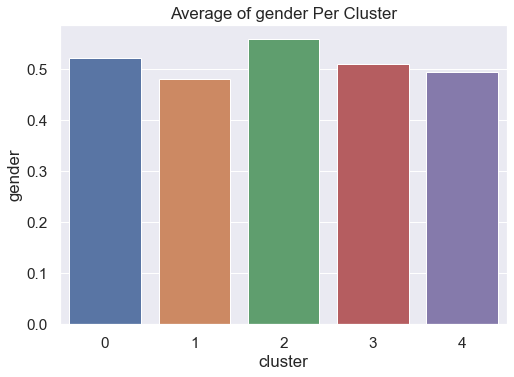

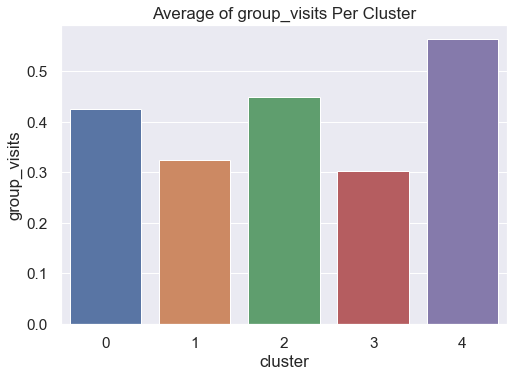

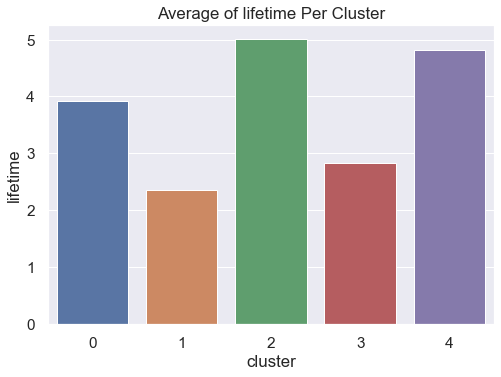

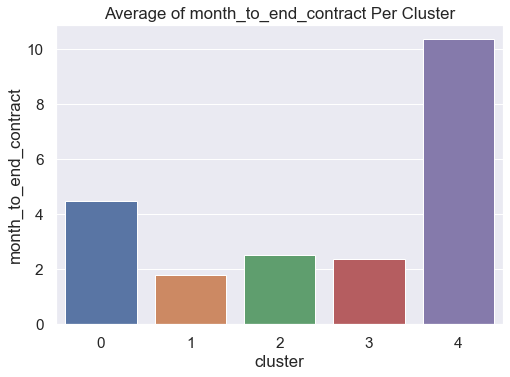

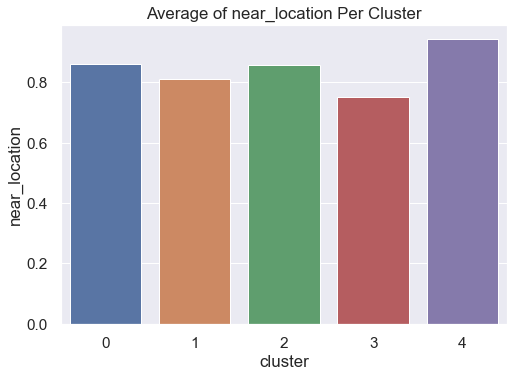

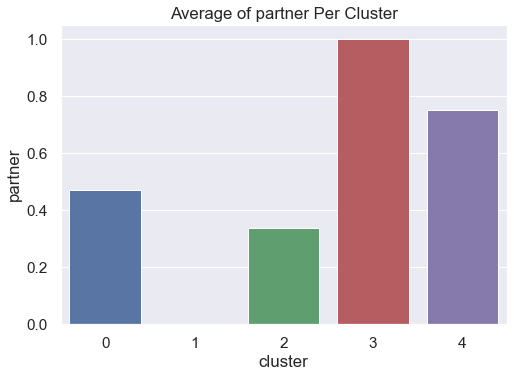

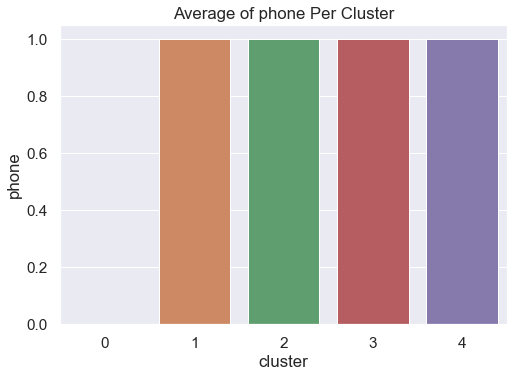

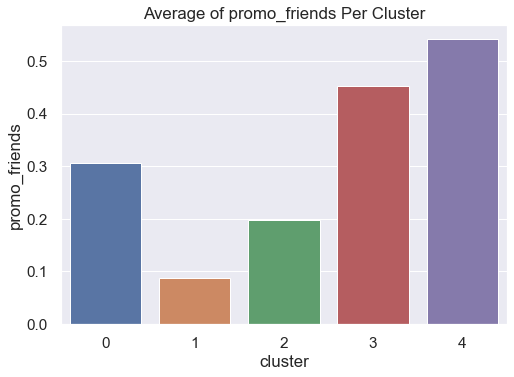

In [128]:
#graph look
gym_pt = gym.pivot_table(index='cluster').reset_index()

for feat in gym_pt.drop('cluster',axis=1).columns:
    sns.barplot(x='cluster',y=feat,data=gym_pt)
    sns.set(font_scale=1.4)
    plt.title('Average of '+feat+' Per Cluster')
    plt.show()

#### Conclusions

- Clusters 2 and 4 are spending the most extra money, coming to the most group classes, visited the most, and have a longer lifetime.

- Cluster 4 have the longest contracts

- All of cluster 3 came through a partner program

- more than 50% of cluster 4 and 45% of cluster 3 came through friends promo

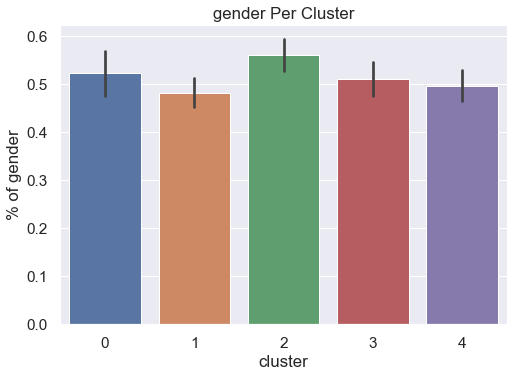

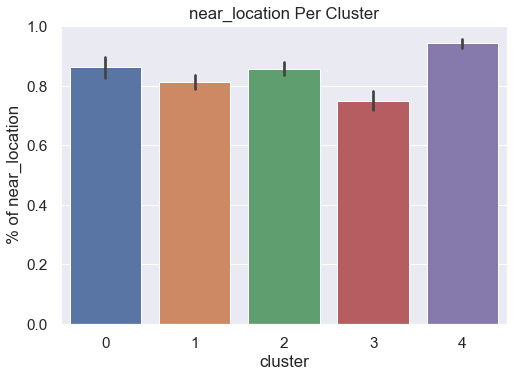

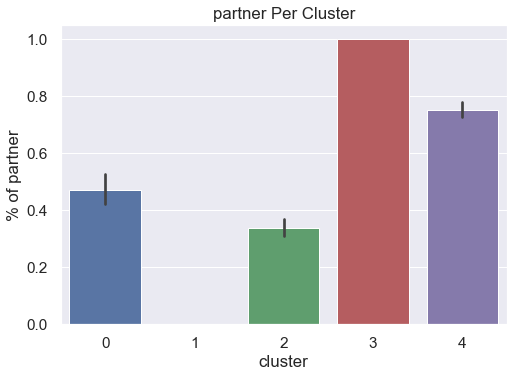

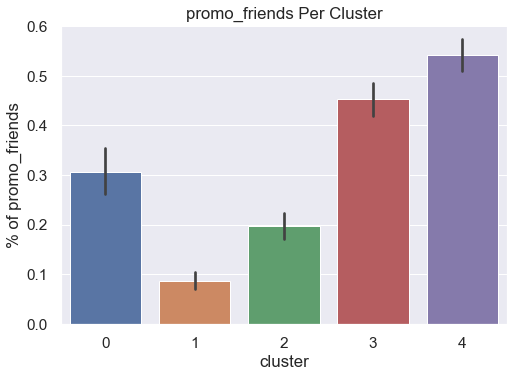

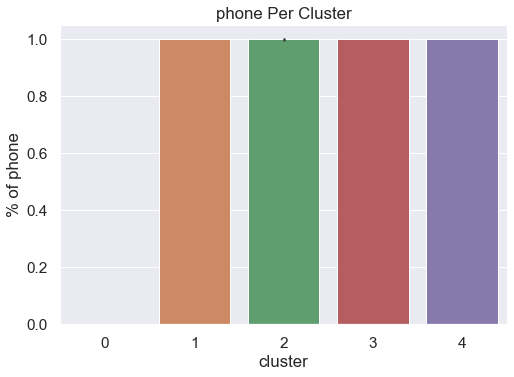

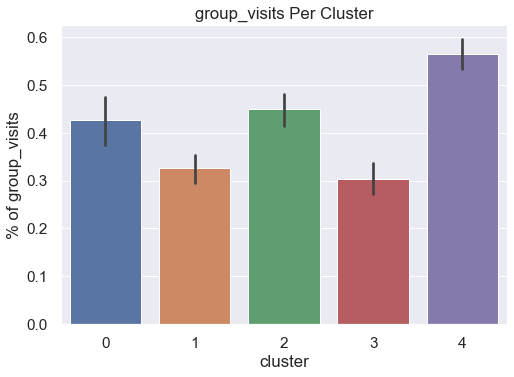

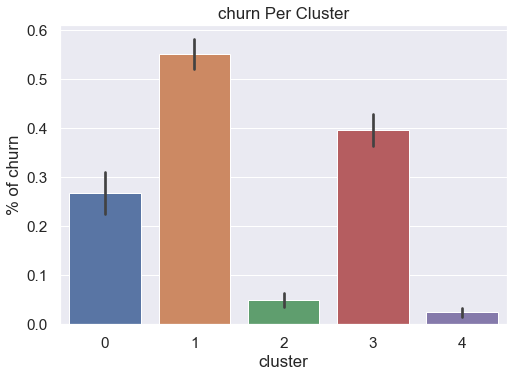

In [129]:
#Plot distributions of features for the clusters

bar_feat = ['gender','near_location','partner','promo_friends','phone','group_visits','churn']

hist_feat = ['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']


for feat in bar_feat:
    sns.barplot(x='cluster',y=feat,data=gym)
    plt.title(feat+' Per Cluster')
    plt.ylabel('% of '+feat)
    plt.show()

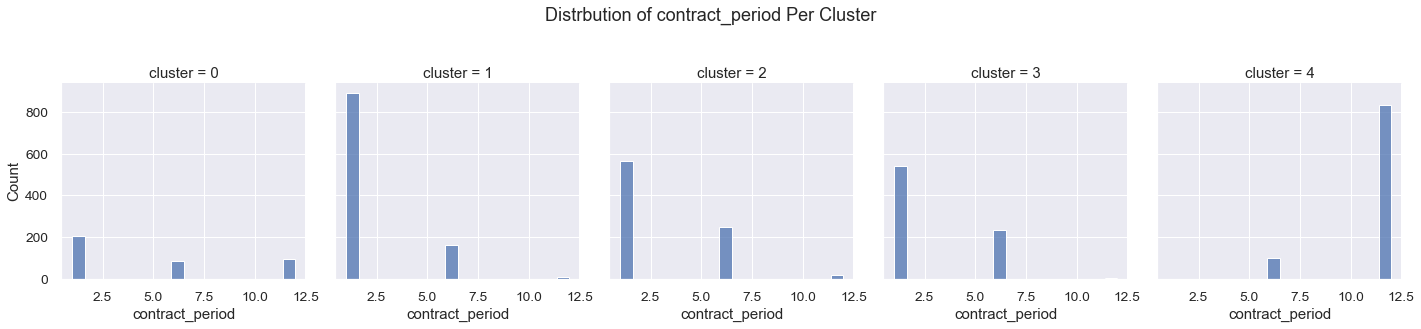

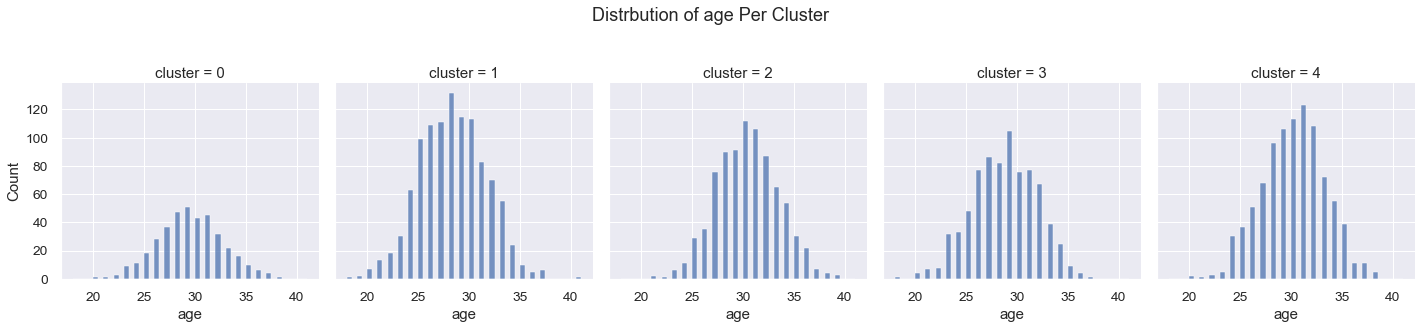

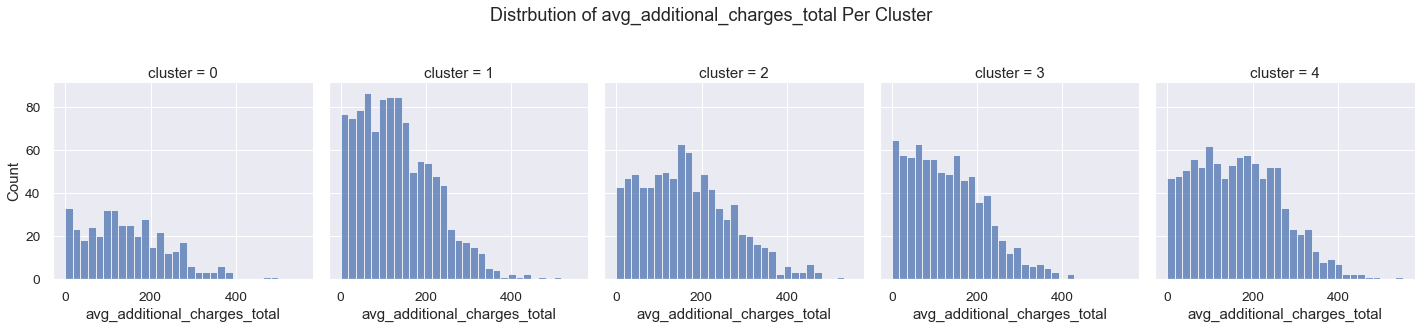

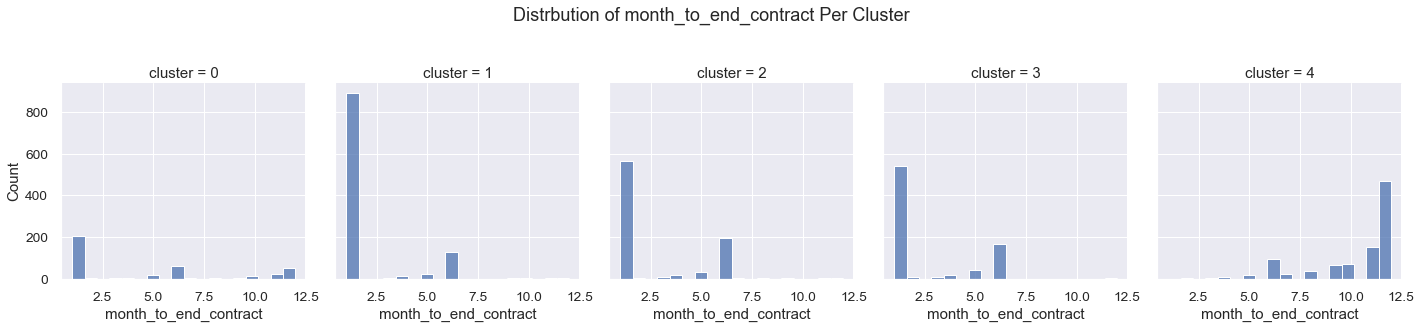

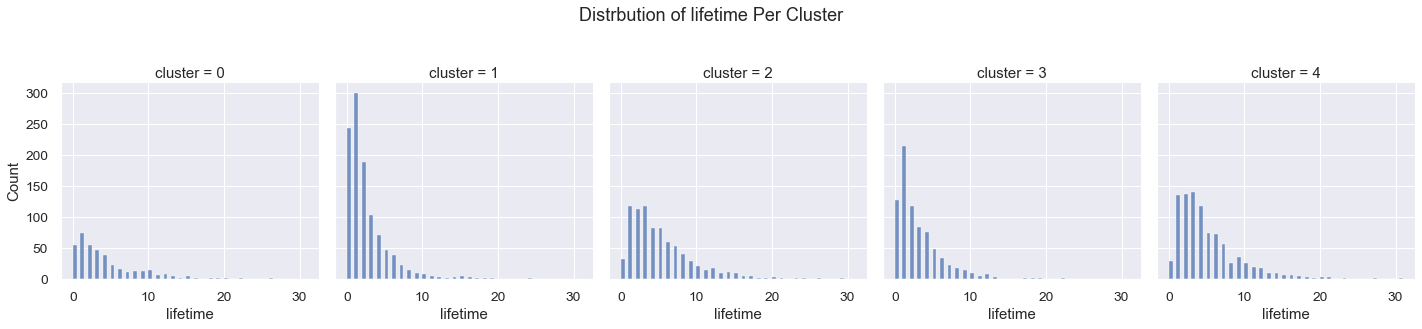

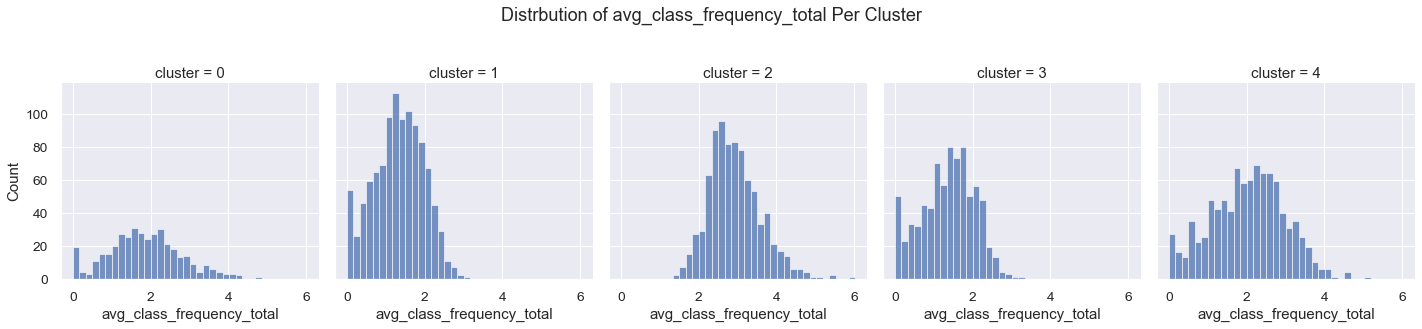

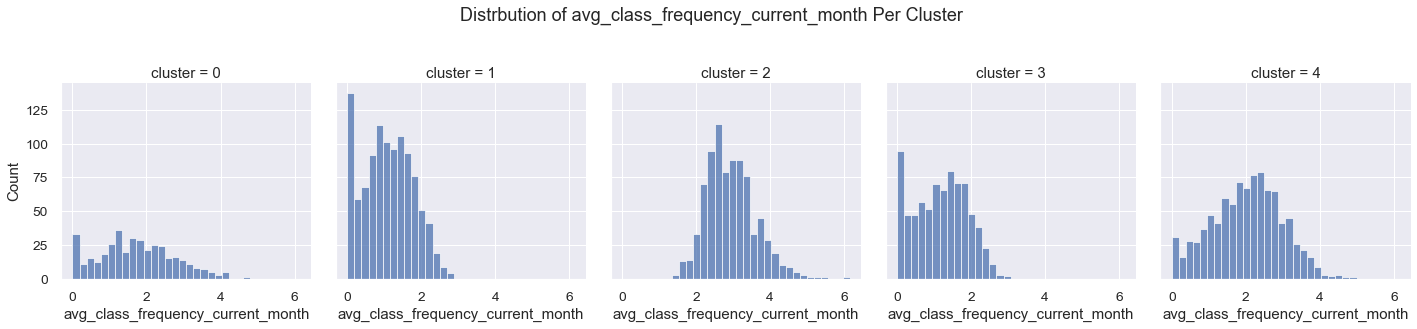

In [130]:
for feat in hist_feat:
    sns.set(font_scale=1.25)
    sns.displot(data=gym,x=feat,col='cluster',height=4, aspect=1)
    plt.suptitle('Distrbution of '+feat+' Per Cluster',y=1.15)
    plt.show()
    print()
    print()

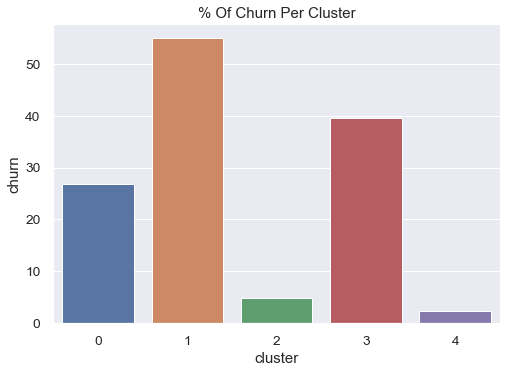

In [131]:
#Calculating churn for each cluster

cluster_pt = gym.groupby('cluster').mean().reset_index()

cluster_pt['churn'] = cluster_pt['churn']*100

sns.barplot(x='cluster',y='churn',data=cluster_pt)
plt.title('% Of Churn Per Cluster')
plt.show()

#### Conclusion

Clusters 2 and 4 are the most loyal with a churn rate lower than 10% 

while clusters 1 have 55% churn rate and cluster 3 have 40% churn rate


## Final Conclusion

- Clusters 2 and 4 are the most loyal groups.

- We probably should address most of our marketing to those 2 groups.

- Try to close a long contract at the beginning as this may increase the chances of the customer to stay

- The first 3 month are critical, during them customers should feel they are taken care, recive emails/phone calls to make sure they are aware of all the services we offer, happy and know how and when they are able to come to the gym.

- 1.5 months before a client finish his contract, we should keep in touch with him, make sure he is satisfied with the service, if not maybe we can offer a proper compensation and ask what could have we done better.

- We should increase the number of companies in our partner program and make more friends promotions as they are helpful in keeping clients not to churn.